In [2]:
# import tensorflow as tf
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

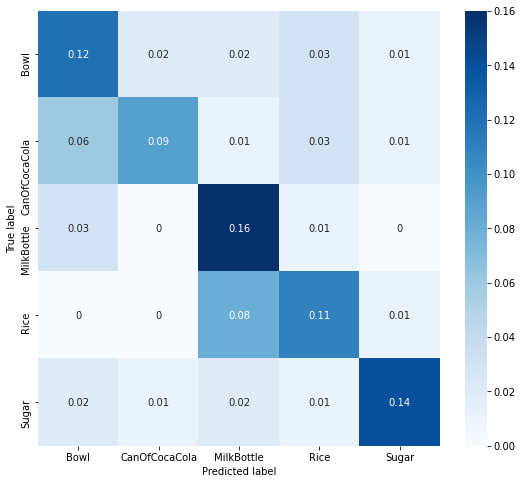

In [6]:
class_names = ["Bowl", "CanOfCocaCola", "MilkBottle", "Rice", "Sugar"]

y_pred_raw = np.random.randn(100, 5) * 0.1
y_pred_raw[0:20, 0] = 10 * np.random.randn(20) + 5
y_pred_raw[20:40, 1] = 10 * np.random.randn(20) + 5  
y_pred_raw[40:70, 2] = 10 * np.random.randn(30) + 5  
y_pred_raw[70:80, 3] = 10 * np.random.randn(10) + 5  
y_pred_raw[80:, 4] = 10 * np.random.randn(20) + 5  
y_pred = np.argmax(y_pred_raw, axis=1)

y_true =  [0] * 20 + [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20

cnf = confusion_matrix(y_true=y_true, y_pred=y_pred, normalize='all')


df_cm = pd.DataFrame(cnf, index=class_names, columns=class_names)
plt.figure(figsize = (9,8))
ax = sn.heatmap(df_cm, annot=True, cmap="Blues")

# plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.savefig('file.png')


In [3]:
# cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# for cmap in cmaps:
#     sn.heatmap(df_cm, annot=True, cmap=cmap)
#     plt.show()
#     input(f"Current cmap is {cmap}. Press enter to continue...")

In [5]:
from utils import get_confusion_matrix

array = get_confusion_matrix(y_true, y_pred, class_names=class_names)

<AxesSubplot:>

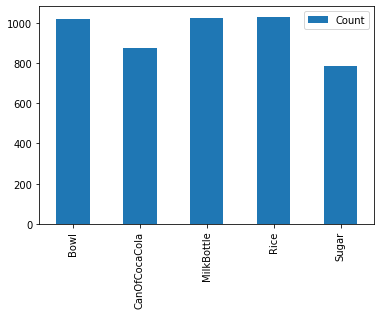

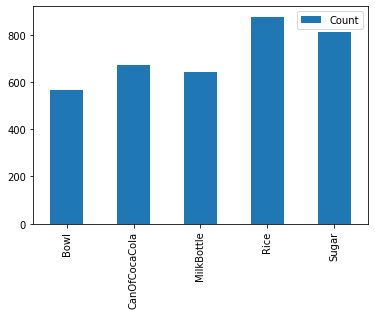

In [31]:
from pathlib import Path
import pandas as pd

def get_class_counts(db_dir):
    classes = []
    for p in Path(db_dir).glob('*'):
        name = p.name
        total = len(list(p.glob('*.png')))
        classes.append({'ClassName': name, 'Count': total})
    return classes


train_dir = "DB/train/"
test_dir = "DB/test/"

train_classes = get_class_counts(train_dir)
test_classes = get_class_counts(test_dir)

df_train = pd.DataFrame([p['Count'] for p in train_classes], index=[p['ClassName'] for p in train_classes], columns=['train'])
df_test = pd.DataFrame([p['Count'] for p in test_classes], index=[p['ClassName'] for p in test_classes], columns=['Count'])
# df_classes = pd.DataFrame(classes)
df_train.plot.bar()
df_test.plot.bar()


<AxesSubplot:xlabel='ClassName'>

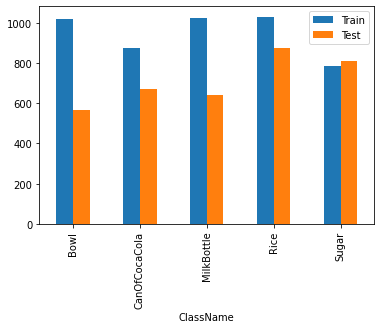

In [38]:
from pathlib import Path
import pandas as pd

def get_class_counts(train_dir, test_dir):
    classes = []
    train_dir, test_dir = Path(train_dir), Path(test_dir)
    for p in train_dir.glob('*'):
        train_count = len(list(p.glob('*.png')))
        test_count = len(list((test_dir/p.name).glob('*.png')))
        classes.append({'ClassName': p.name, 'Train': train_count, 'Test': test_count})
    return classes


train_dir = "DB/train/"
test_dir = "DB/test/"

classes = get_class_counts(train_dir, test_dir)

df_classes = pd.DataFrame(classes)
df_classes.set_index('ClassName', inplace=True)
df_classes.plot.bar()

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class_names = ["Bowl", "CanOfCocaCola", "MilkBottle", "Rice", "Sugar"]

train_directory = 'DB/train'

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        brightness_range=[0.9,1.0],
        fill_mode="nearest")

# Data loading 
train_batches = train_datagen.flow_from_directory(
        train_directory,
        target_size=(224,224),
        batch_size=4,
        color_mode="rgb",
        class_mode='categorical',
        shuffle=True)

Found 4736 images belonging to 5 classes.


In [51]:
list(train_batches.class_indices.keys())

['Bowl', 'CanOfCocaCola', 'MilkBottle', 'Rice', 'Sugar']